Import libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

Read main csv file:

In [2]:
application_train = pd.read_csv('data/application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature analysis

Get description of each column:

In [3]:
full_description = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = "ISO-8859-1").iloc[:, 1:]

def create_description(full_df, describe_df_name):
    describe_df = full_df[full_df.Table==describe_df_name][['Row', 'Description']]
    describe_df.index = describe_df['Row']
    describe_df = describe_df[['Description']].T
    describe_df.columns.name = None
    
    return describe_df

appl_description = create_description(full_description, 'application_{train|test}.csv')
appl_description

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Description,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,Did client provide document 18,Did client provide document 19,Did client provide document 20,Did client provide document 21,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...


Type of features in data:

In [4]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Data contains 65 numeric features, 41 number feateres and 16 categorical.

## Categorical features

Show **categorical features:**

In [6]:
cat_columns = application_train.dtypes[application_train.dtypes==object].index

cat_train = application_train[cat_columns]

cat_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


### Distribution of categorical features:

In [7]:
for column in cat_train.columns:
    print('\n==============\n', column, '-' ,appl_description[column].values[0], '\n==============')
    print(cat_train[column].value_counts(normalize=True)*100)


 NAME_CONTRACT_TYPE - Identification if loan is cash or revolving 
Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

 CODE_GENDER - Gender of the client 
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

 FLAG_OWN_CAR - Flag if the client owns a car 
N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

 FLAG_OWN_REALTY - Flag if client owns a house or flat 
Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

 NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan 
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

 NAME_INCOME_TYPE - Clients income type (businessman, working, maternity leave,) 
Working                 51.631974
Commercial associate    23.289

Binary features:
* NAME_CONTRACT_TYPE - Cash loans, Revolving loans
* CODE_GENDER  - F, M, XNA
* FLAG_OWN_CAR - Y, N
* FLAG_OWN_REALTY - Y, N
* EMERGENCYSTATE_MODE - Yes, No

Close to binary (can transform to binary):
* HOUSETYPE_MODE - could tranform to (Flats - 98%, Not Flats - 2%)
* NAME_TYPE_SUITE - could tranform to (Unaccompanied - 81%, accompanied - 19%)
* NAME_FAMILY_STATUS - could tranform to (Have pair - 70%, Dont have pair - 30%)
* NAME_HOUSING_TYPE - could tranform to (House - 89%, Not house - 11%)
* WEEKDAY_APPR_PROCESS_START - could tranform to (Weekday - 84%, Weekend - 16%)

Ordinal data:
* NAME_EDUCATION_TYPE
    * "Lower secondary": 1
    * "Secondary / secondary special": 2
    * "Incomplete higher": 3
    * "Higher education": 4
    * "Academic degree": 5

Categorical data:
* NAME_INCOME_TYPE 
* OCCUPATION_TYPE 
* ORGANIZATION_TYPE 
* FONDKAPREMONT_MODE 
* WALLSMATERIAL_MODE 

### Distribution of categorical features in default and not defaul group:

In [8]:
def plot_distbars(column_name, data=application_train):
    """
    data - full df
    column_name - feature to plot
    """
    # Extract default and undefault sets
    
    default = data[data.TARGET == 1][column_name]
    undef = data[data.TARGET == 0][column_name]
    
    # Unique names in feature
    cat_names = data[column_name].value_counts(normalize=True).index
    
    # Find distribution of feature
    all_vals = data[column_name].value_counts(normalize=True)
    def_vals = default.value_counts(normalize=True)
    undef_vals = undef.value_counts(normalize=True)
    
    # Plot two charts if frequency of most common a lot more than least common.
    if max(all_vals) > 10*min(all_vals):
        # Find most common names and others
        major_names = [name for name in cat_names if (all_vals[name]>0.1*max(all_vals))]
        minor_names = cat_names[len(major_names):]
        
        major = {'def': def_vals[major_names],
                 'undef': undef_vals[major_names]}
        
        minor = {'def': def_vals[minor_names],
                 'undef': undef_vals[minor_names]}
        
        # Plot
        fig, (ax_maj, ax_min) = plt.subplots(1, 2, figsize = (16, 8))
        
        ax_maj.bar(major_names, major['def'], label='default', color='r', width=0.6)
        ax_maj.bar(major_names, major['undef'], label='good', color='g', align='edge', width=0.6)
        ax_maj.set_ylabel('Frequency', position=(0, 1), rotation=0)
        
        ax_min.bar(minor_names, minor['def'], label='default', color='r', width=0.6)
        ax_min.bar(minor_names, minor['undef'], label='good', color='g', align='edge', width=0.6)
        ax_min.set_ylabel('Frequency', position=(0, 1), rotation=0)
        
        plt.legend()
        plt.show()
        
    # Plot one chart.
    else:
        plt.figure(figsize=(16,8))
        def_vals.plot(kind='bar', color='r', label='default')
        undef_vals.plot(kind='bar', color='g', label='good', align='edge')
        plt.ylabel('Frequency', position=(0, 1), rotation=0)
        plt.legend()
        plt.show()

Analysis of **NAME_INCOME_TYPE**

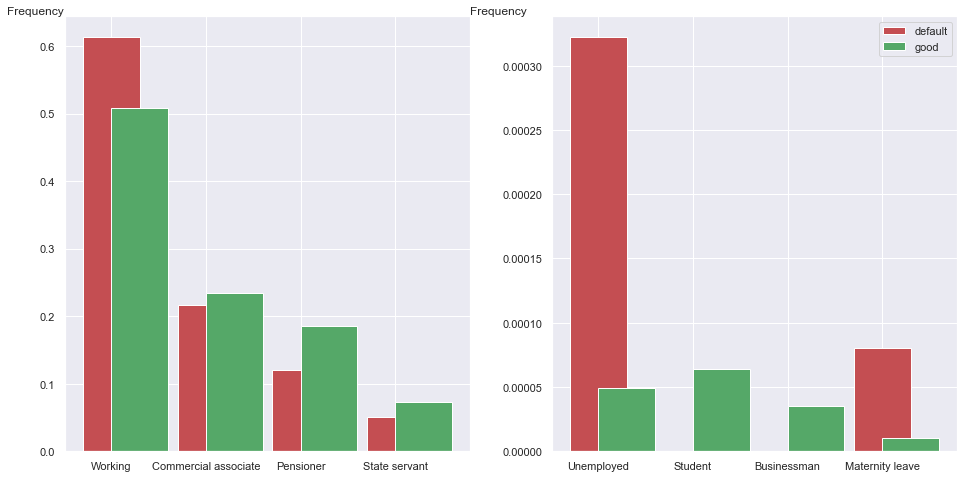

In [9]:
plot_distbars('NAME_INCOME_TYPE')

As we can see "Unemployed" and "Maternity leave" are at **risk**.